# Linear Algebra Fundamentals for Deep Learning
By: Wilfredo Aaron Sosa Ramos (Senior AI Engineer)

Scalar: 42
Vector: [1 2 3]
Matrix:
[[1 2]
 [3 4]]
Tensor:
[[[2.34370798e-01 3.76608321e-01 1.40622804e-02]
  [1.12291846e-02 5.56590426e-04 1.08157330e-01]]

 [[6.54196406e-01 2.92934411e-01 4.61928156e-01]
  [3.51863390e-01 5.99398884e-01 8.31324664e-01]]]

Function: multiply_matrices_vectors
Result: [ 5 11]
Latency: 0.000031s

Function: identity_and_inverse_matrices
Result: (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[  64.13674345,  157.40124726, -241.70858302],
       [ -31.516151  ,  -82.9946441 ,  125.47614369],
       [  14.17737583,   38.78112921,  -56.85631018]]))
Latency: 0.003844s

Function: linear_dependence
Result: 2
Latency: 0.000234s

Function: compute_norms
Result: [6.         3.74165739]
Latency: 0.000143s

Function: special_matrices
Result: (array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]]), array([[0.99180833, 0.31344626, 0.38116234],
       [0.31344626, 0.76892778, 0.38430292],
       [0.38116234, 0.38430292, 0.62492151]]))
Latency:

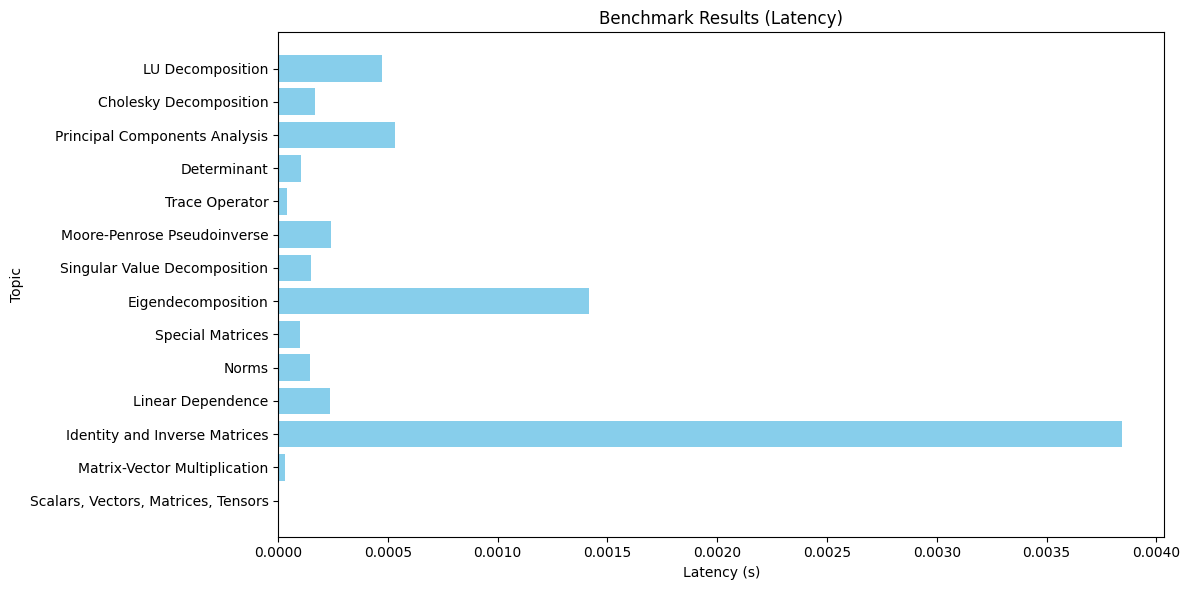

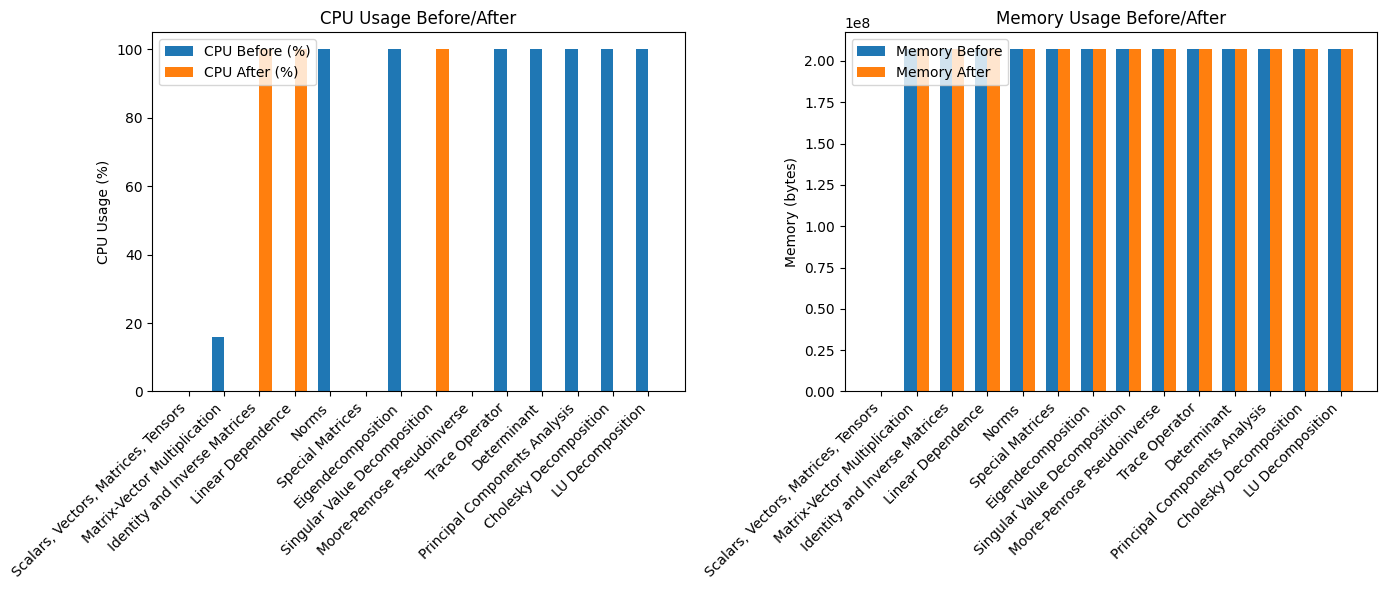

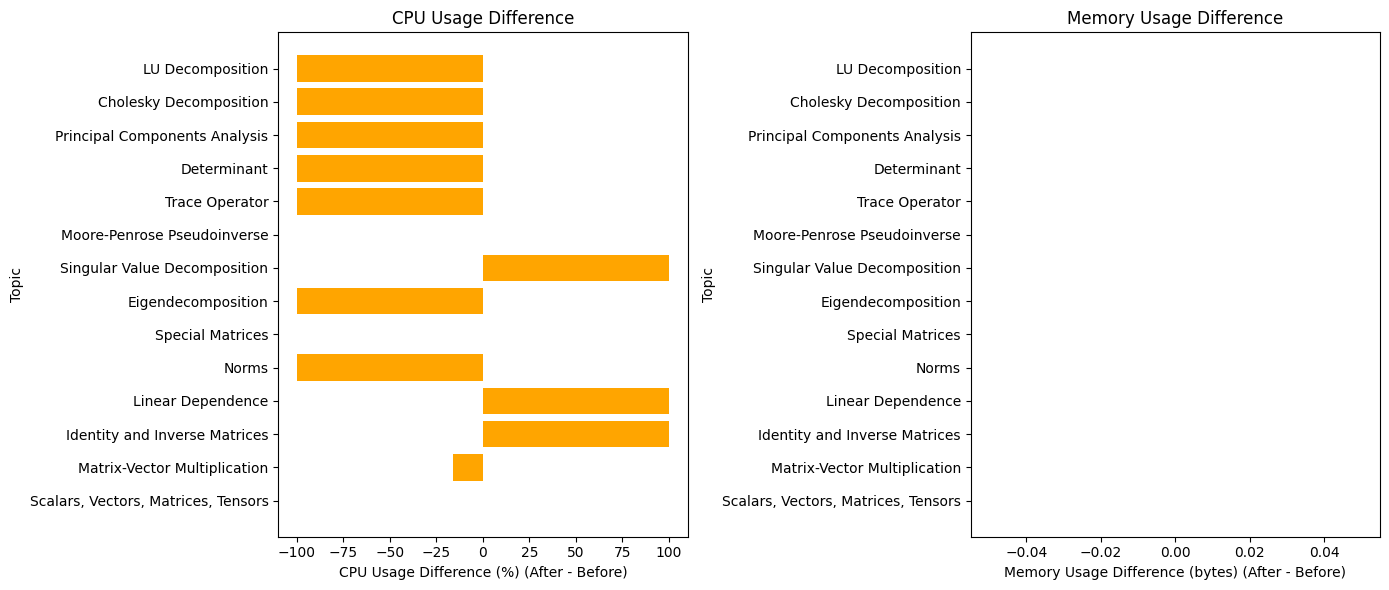

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

try:
    import psutil  # Optional for CPU and memory usage
    PSUTIL_AVAILABLE = True
except ImportError:
    PSUTIL_AVAILABLE = False

# Global list for benchmark results
benchmark_results = []

def benchmark_function(func, *args, **kwargs):
    """
    Benchmarks a function's latency and collects extra metrics (CPU, memory, etc. if psutil is available).
    Returns:
        result: output of the function
        metrics: dictionary with various measured metrics
    """
    cpu_before = psutil.cpu_percent(interval=None) if PSUTIL_AVAILABLE else None
    mem_before = psutil.Process().memory_info().rss if PSUTIL_AVAILABLE else None
    start_time = time.time()

    # Run the function
    result = func(*args, **kwargs)

    end_time = time.time()
    latency = end_time - start_time
    cpu_after = psutil.cpu_percent(interval=None) if PSUTIL_AVAILABLE else None
    mem_after = psutil.Process().memory_info().rss if PSUTIL_AVAILABLE else None

    # Construct the metrics dictionary
    metrics = {
        "latency_s": latency,
        "cpu_percent_before": cpu_before,
        "cpu_percent_after": cpu_after,
        "memory_usage_before_bytes": mem_before,
        "memory_usage_after_bytes": mem_after,
        "input_shapes": [arg.shape if hasattr(arg, "shape") else None for arg in args],
        "output_shape": result.shape if (isinstance(result, np.ndarray)) else None
    }

    # Print or log the function name, result, and latency for quick reference
    print(f"Function: {func.__name__}")
    print(f"Result: {result if not isinstance(result, np.ndarray) or result.size < 20 else 'Result array too large to display'}")
    print(f"Latency: {latency:.6f}s\n")

    return result, metrics

# ------------------------------------------------------------------------------
# 2.1 Scalars, Vectors, Matrices, and Tensors
# ------------------------------------------------------------------------------
scalar = 42
vector = np.array([1, 2, 3])
vector_mul = np.array([1, 2])
matrix = np.array([[1, 2], [3, 4]])
tensor = np.random.rand(2, 2, 3)

print(f"Scalar: {scalar}")
print(f"Vector: {vector}")
print(f"Matrix:\n{matrix}")
print(f"Tensor:\n{tensor}\n")

benchmark_results.append({
    "Topic": "Scalars, Vectors, Matrices, Tensors",
    "Latency (s)": 0.0,
    "CPU Before (%)": None,
    "CPU After (%)": None,
    "Memory Before (bytes)": None,
    "Memory After (bytes)": None
})

# ------------------------------------------------------------------------------
# 2.2 Multiplying Matrices and Vectors
# ------------------------------------------------------------------------------
def multiply_matrices_vectors(mat, vec):
    """Ensures correct dimensions: mat.shape[1] == vec.shape[0]."""
    if mat.shape[1] != vec.shape[0]:
        raise ValueError("Matrix columns must match vector size.")
    return np.dot(mat, vec)

mv_result, mv_metrics = benchmark_function(multiply_matrices_vectors, matrix, vector_mul)
benchmark_results.append({
    "Topic": "Matrix-Vector Multiplication",
    "Latency (s)": mv_metrics["latency_s"],
    "CPU Before (%)": mv_metrics["cpu_percent_before"],
    "CPU After (%)": mv_metrics["cpu_percent_after"],
    "Memory Before (bytes)": mv_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": mv_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.3 Identity and Inverse Matrices
# ------------------------------------------------------------------------------
def identity_and_inverse_matrices(size):
    """
    Creates a random matrix of shape (size, size),
    returns the identity matrix and its inverse.
    """
    mat = np.random.rand(size, size)
    mat += np.eye(size) * 1e-8  # Small shift to reduce singularities
    identity = np.eye(size)
    inverse = np.linalg.inv(mat)
    return identity, inverse

iim_result, iim_metrics = benchmark_function(identity_and_inverse_matrices, 3)
benchmark_results.append({
    "Topic": "Identity and Inverse Matrices",
    "Latency (s)": iim_metrics["latency_s"],
    "CPU Before (%)": iim_metrics["cpu_percent_before"],
    "CPU After (%)": iim_metrics["cpu_percent_after"],
    "Memory Before (bytes)": iim_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": iim_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.4 Linear Dependence and Span
# ------------------------------------------------------------------------------
def linear_dependence(mat):
    """
    Returns the rank of the matrix, which indicates
    whether vectors (rows/columns) are linearly independent.
    """
    return np.linalg.matrix_rank(mat)

ld_result, ld_metrics = benchmark_function(linear_dependence, matrix)
benchmark_results.append({
    "Topic": "Linear Dependence",
    "Latency (s)": ld_metrics["latency_s"],
    "CPU Before (%)": ld_metrics["cpu_percent_before"],
    "CPU After (%)": ld_metrics["cpu_percent_after"],
    "Memory Before (bytes)": ld_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": ld_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.5 Norms
# ------------------------------------------------------------------------------
def compute_norms(vec):
    """
    Computes L1 and L2 norms of a vector.
    """
    l1_norm = np.linalg.norm(vec, 1)
    l2_norm = np.linalg.norm(vec, 2)
    return np.array([l1_norm, l2_norm])

norms_result, norms_metrics = benchmark_function(compute_norms, vector)
benchmark_results.append({
    "Topic": "Norms",
    "Latency (s)": norms_metrics["latency_s"],
    "CPU Before (%)": norms_metrics["cpu_percent_before"],
    "CPU After (%)": norms_metrics["cpu_percent_after"],
    "Memory Before (bytes)": norms_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": norms_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.6 Special Kinds of Matrices and Vectors
# ------------------------------------------------------------------------------
def special_matrices(size):
    """
    Returns a diagonal matrix and a symmetric matrix for the given size.
    """
    diag = np.diag(np.arange(1, size + 1))
    sym = np.random.rand(size, size)
    sym = (sym + sym.T) / 2  # symmetrize
    return diag, sym

sm_result, sm_metrics = benchmark_function(special_matrices, 3)
benchmark_results.append({
    "Topic": "Special Matrices",
    "Latency (s)": sm_metrics["latency_s"],
    "CPU Before (%)": sm_metrics["cpu_percent_before"],
    "CPU After (%)": sm_metrics["cpu_percent_after"],
    "Memory Before (bytes)": sm_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": sm_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.7 Eigendecomposition
# ------------------------------------------------------------------------------
def eigendecomposition(mat):
    """
    Returns the eigenvalues and eigenvectors of a square matrix.
    """
    if mat.shape[0] != mat.shape[1]:
        raise ValueError("Matrix must be square to perform eigendecomposition.")
    eigenvalues, eigenvectors = np.linalg.eig(mat)
    return eigenvalues, eigenvectors

ed_result, ed_metrics = benchmark_function(eigendecomposition, matrix)
benchmark_results.append({
    "Topic": "Eigendecomposition",
    "Latency (s)": ed_metrics["latency_s"],
    "CPU Before (%)": ed_metrics["cpu_percent_before"],
    "CPU After (%)": ed_metrics["cpu_percent_after"],
    "Memory Before (bytes)": ed_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": ed_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.8 Singular Value Decomposition
# ------------------------------------------------------------------------------
def singular_value_decomposition(mat):
    """
    Returns U, S, V from the SVD of a matrix.
    """
    U, S, Vt = np.linalg.svd(mat, full_matrices=False)
    return U, S, Vt

svd_result, svd_metrics = benchmark_function(singular_value_decomposition, matrix)
benchmark_results.append({
    "Topic": "Singular Value Decomposition",
    "Latency (s)": svd_metrics["latency_s"],
    "CPU Before (%)": svd_metrics["cpu_percent_before"],
    "CPU After (%)": svd_metrics["cpu_percent_after"],
    "Memory Before (bytes)": svd_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": svd_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.9 The Moore-Penrose Pseudoinverse
# ------------------------------------------------------------------------------
def pseudoinverse(mat):
    """
    Returns the Moore-Penrose pseudoinverse of the matrix.
    """
    return np.linalg.pinv(mat)

pi_result, pi_metrics = benchmark_function(pseudoinverse, matrix)
benchmark_results.append({
    "Topic": "Moore-Penrose Pseudoinverse",
    "Latency (s)": pi_metrics["latency_s"],
    "CPU Before (%)": pi_metrics["cpu_percent_before"],
    "CPU After (%)": pi_metrics["cpu_percent_after"],
    "Memory Before (bytes)": pi_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": pi_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.10 The Trace Operator
# ------------------------------------------------------------------------------
def trace_operator(mat):
    """
    Returns the trace of a square matrix.
    """
    if mat.shape[0] != mat.shape[1]:
        raise ValueError("Matrix must be square to compute trace.")
    return np.trace(mat)

tr_result, tr_metrics = benchmark_function(trace_operator, matrix)
benchmark_results.append({
    "Topic": "Trace Operator",
    "Latency (s)": tr_metrics["latency_s"],
    "CPU Before (%)": tr_metrics["cpu_percent_before"],
    "CPU After (%)": tr_metrics["cpu_percent_after"],
    "Memory Before (bytes)": tr_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": tr_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.11 The Determinant
# ------------------------------------------------------------------------------
def determinant(mat):
    """
    Returns the determinant of a square matrix.
    """
    if mat.shape[0] != mat.shape[1]:
        raise ValueError("Matrix must be square to compute determinant.")
    return np.linalg.det(mat)

det_result, det_metrics = benchmark_function(determinant, matrix)
benchmark_results.append({
    "Topic": "Determinant",
    "Latency (s)": det_metrics["latency_s"],
    "CPU Before (%)": det_metrics["cpu_percent_before"],
    "CPU After (%)": det_metrics["cpu_percent_after"],
    "Memory Before (bytes)": det_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": det_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.12 Example: Principal Components Analysis (PCA)
# ------------------------------------------------------------------------------
def principal_components_analysis(data):
    """
    Performs PCA on the input data, returns eigenvalues and eigenvectors
    of its covariance matrix.
    """
    mean_centered = data - np.mean(data, axis=0)
    cov_matrix = np.cov(mean_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

pca_data = np.random.rand(100, 5)  # More columns for a richer example
pca_result, pca_metrics = benchmark_function(principal_components_analysis, pca_data)
benchmark_results.append({
    "Topic": "Principal Components Analysis",
    "Latency (s)": pca_metrics["latency_s"],
    "CPU Before (%)": pca_metrics["cpu_percent_before"],
    "CPU After (%)": pca_metrics["cpu_percent_after"],
    "Memory Before (bytes)": pca_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": pca_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.13 Cholesky Decomposition
# ------------------------------------------------------------------------------
def cholesky_decomposition(mat):
    """
    Computes the Cholesky decomposition of a positive-definite matrix.
    """
    # Make sure the matrix is symmetric positive-definite.
    sym_mat = (mat + mat.T) / 2
    sym_mat += np.eye(sym_mat.shape[0]) * 1  # Increase diagonal to ensure positivity
    return np.linalg.cholesky(sym_mat)

chol_result, chol_metrics = benchmark_function(cholesky_decomposition, matrix)
benchmark_results.append({
    "Topic": "Cholesky Decomposition",
    "Latency (s)": chol_metrics["latency_s"],
    "CPU Before (%)": chol_metrics["cpu_percent_before"],
    "CPU After (%)": chol_metrics["cpu_percent_after"],
    "Memory Before (bytes)": chol_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": chol_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# 2.14 LU Decomposition
# ------------------------------------------------------------------------------
def lu_decomposition(mat):
    """
    Computes the LU Decomposition (using SciPy if available; fallback to a manual method otherwise).
    """
    try:
        import scipy.linalg as la
        P, L, U = la.lu(mat)
        return P, L, U
    except ImportError:
        # Simple fallback if scipy is not available
        # This is a naive, not-optimized approach
        n = mat.shape[0]
        U = mat.copy().astype(float)
        L = np.eye(n)
        for i in range(n):
            for j in range(i+1, n):
                factor = U[j, i] / U[i, i]
                L[j, i] = factor
                U[j, i:] = U[j, i:] - factor * U[i, i:]
        P = np.eye(n)
        return P, L, U

lu_result, lu_metrics = benchmark_function(lu_decomposition, matrix)
benchmark_results.append({
    "Topic": "LU Decomposition",
    "Latency (s)": lu_metrics["latency_s"],
    "CPU Before (%)": lu_metrics["cpu_percent_before"],
    "CPU After (%)": lu_metrics["cpu_percent_after"],
    "Memory Before (bytes)": lu_metrics["memory_usage_before_bytes"],
    "Memory After (bytes)": lu_metrics["memory_usage_after_bytes"]
})

# ------------------------------------------------------------------------------
# Visualization Functions
# ------------------------------------------------------------------------------

def plot_benchmark_results(results):
    """
    Plots the benchmark latency results in a horizontal bar chart.
    """
    benchmark_df = pd.DataFrame(results)

    # Convert None metrics to 0 for plotting clarity
    benchmark_df["Latency (s)"] = benchmark_df["Latency (s)"].fillna(0)

    plt.figure(figsize=(12, 6))
    plt.barh(benchmark_df["Topic"], benchmark_df["Latency (s)"], color="skyblue")
    plt.xlabel("Latency (s)")
    plt.ylabel("Topic")
    plt.title("Benchmark Results (Latency)")
    plt.tight_layout()
    plt.show()

def plot_cpu_memory_usage(results):
    """
    Creates side-by-side bar charts for CPU usage (before vs. after) and
    memory usage (before vs. after).
    """
    benchmark_df = pd.DataFrame(results)
    # Replace None with 0 for plotting
    benchmark_df["CPU Before (%)"] = benchmark_df["CPU Before (%)"].fillna(0)
    benchmark_df["CPU After (%)"] = benchmark_df["CPU After (%)"].fillna(0)
    benchmark_df["Memory Before (bytes)"] = benchmark_df["Memory Before (bytes)"].fillna(0)
    benchmark_df["Memory After (bytes)"] = benchmark_df["Memory After (bytes)"].fillna(0)

    x = np.arange(len(benchmark_df))
    width = 0.35

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # CPU usage (left)
    axs[0].bar(x - width/2, benchmark_df["CPU Before (%)"], width, label="CPU Before (%)")
    axs[0].bar(x + width/2, benchmark_df["CPU After (%)"], width, label="CPU After (%)")
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(benchmark_df["Topic"], rotation=45, ha='right')
    axs[0].set_ylabel("CPU Usage (%)")
    axs[0].set_title("CPU Usage Before/After")
    axs[0].legend()

    # Memory usage (right)
    axs[1].bar(x - width/2, benchmark_df["Memory Before (bytes)"], width, label="Memory Before")
    axs[1].bar(x + width/2, benchmark_df["Memory After (bytes)"], width, label="Memory After")
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(benchmark_df["Topic"], rotation=45, ha='right')
    axs[1].set_ylabel("Memory (bytes)")
    axs[1].set_title("Memory Usage Before/After")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

def plot_cpu_memory_diff(results):
    """
    Plots the difference (After - Before) for CPU usage and memory usage.
    """
    benchmark_df = pd.DataFrame(results)
    benchmark_df["CPU Before (%)"] = benchmark_df["CPU Before (%)"].fillna(0)
    benchmark_df["CPU After (%)"] = benchmark_df["CPU After (%)"].fillna(0)
    benchmark_df["Memory Before (bytes)"] = benchmark_df["Memory Before (bytes)"].fillna(0)
    benchmark_df["Memory After (bytes)"] = benchmark_df["Memory After (bytes)"].fillna(0)

    benchmark_df["CPU_Usage_Diff"] = benchmark_df["CPU After (%)"] - benchmark_df["CPU Before (%)"]
    benchmark_df["Memory_Usage_Diff"] = benchmark_df["Memory After (bytes)"] - benchmark_df["Memory Before (bytes)"]

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # CPU difference
    axs[0].barh(benchmark_df["Topic"], benchmark_df["CPU_Usage_Diff"], color="orange")
    axs[0].set_xlabel("CPU Usage Difference (%) (After - Before)")
    axs[0].set_ylabel("Topic")
    axs[0].set_title("CPU Usage Difference")

    # Memory difference
    axs[1].barh(benchmark_df["Topic"], benchmark_df["Memory_Usage_Diff"], color="green")
    axs[1].set_xlabel("Memory Usage Difference (bytes) (After - Before)")
    axs[1].set_ylabel("Topic")
    axs[1].set_title("Memory Usage Difference")

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------------
# Plotting
# ------------------------------------------------------------------------------
plot_benchmark_results(benchmark_results)
plot_cpu_memory_usage(benchmark_results)
plot_cpu_memory_diff(benchmark_results)
